In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data stability

## Number of devices over time

In [2]:
daily_devices_df = pd.read_csv('Metrics/daily_devices.csv')
daily_devices_df['date'] = pd.to_datetime(daily_devices_df['date'])
# Define the date range, some dates in June seems to have issues, thus only Jan to May is shown, adjust if needed
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-05-31')
# Filter the data
daily_devices_df = daily_devices_df[
    (daily_devices_df['date'] >= start_date) & 
    (daily_devices_df['date'] <= end_date)
]
daily_devices_df['date'] = daily_devices_df['date'].dt.date

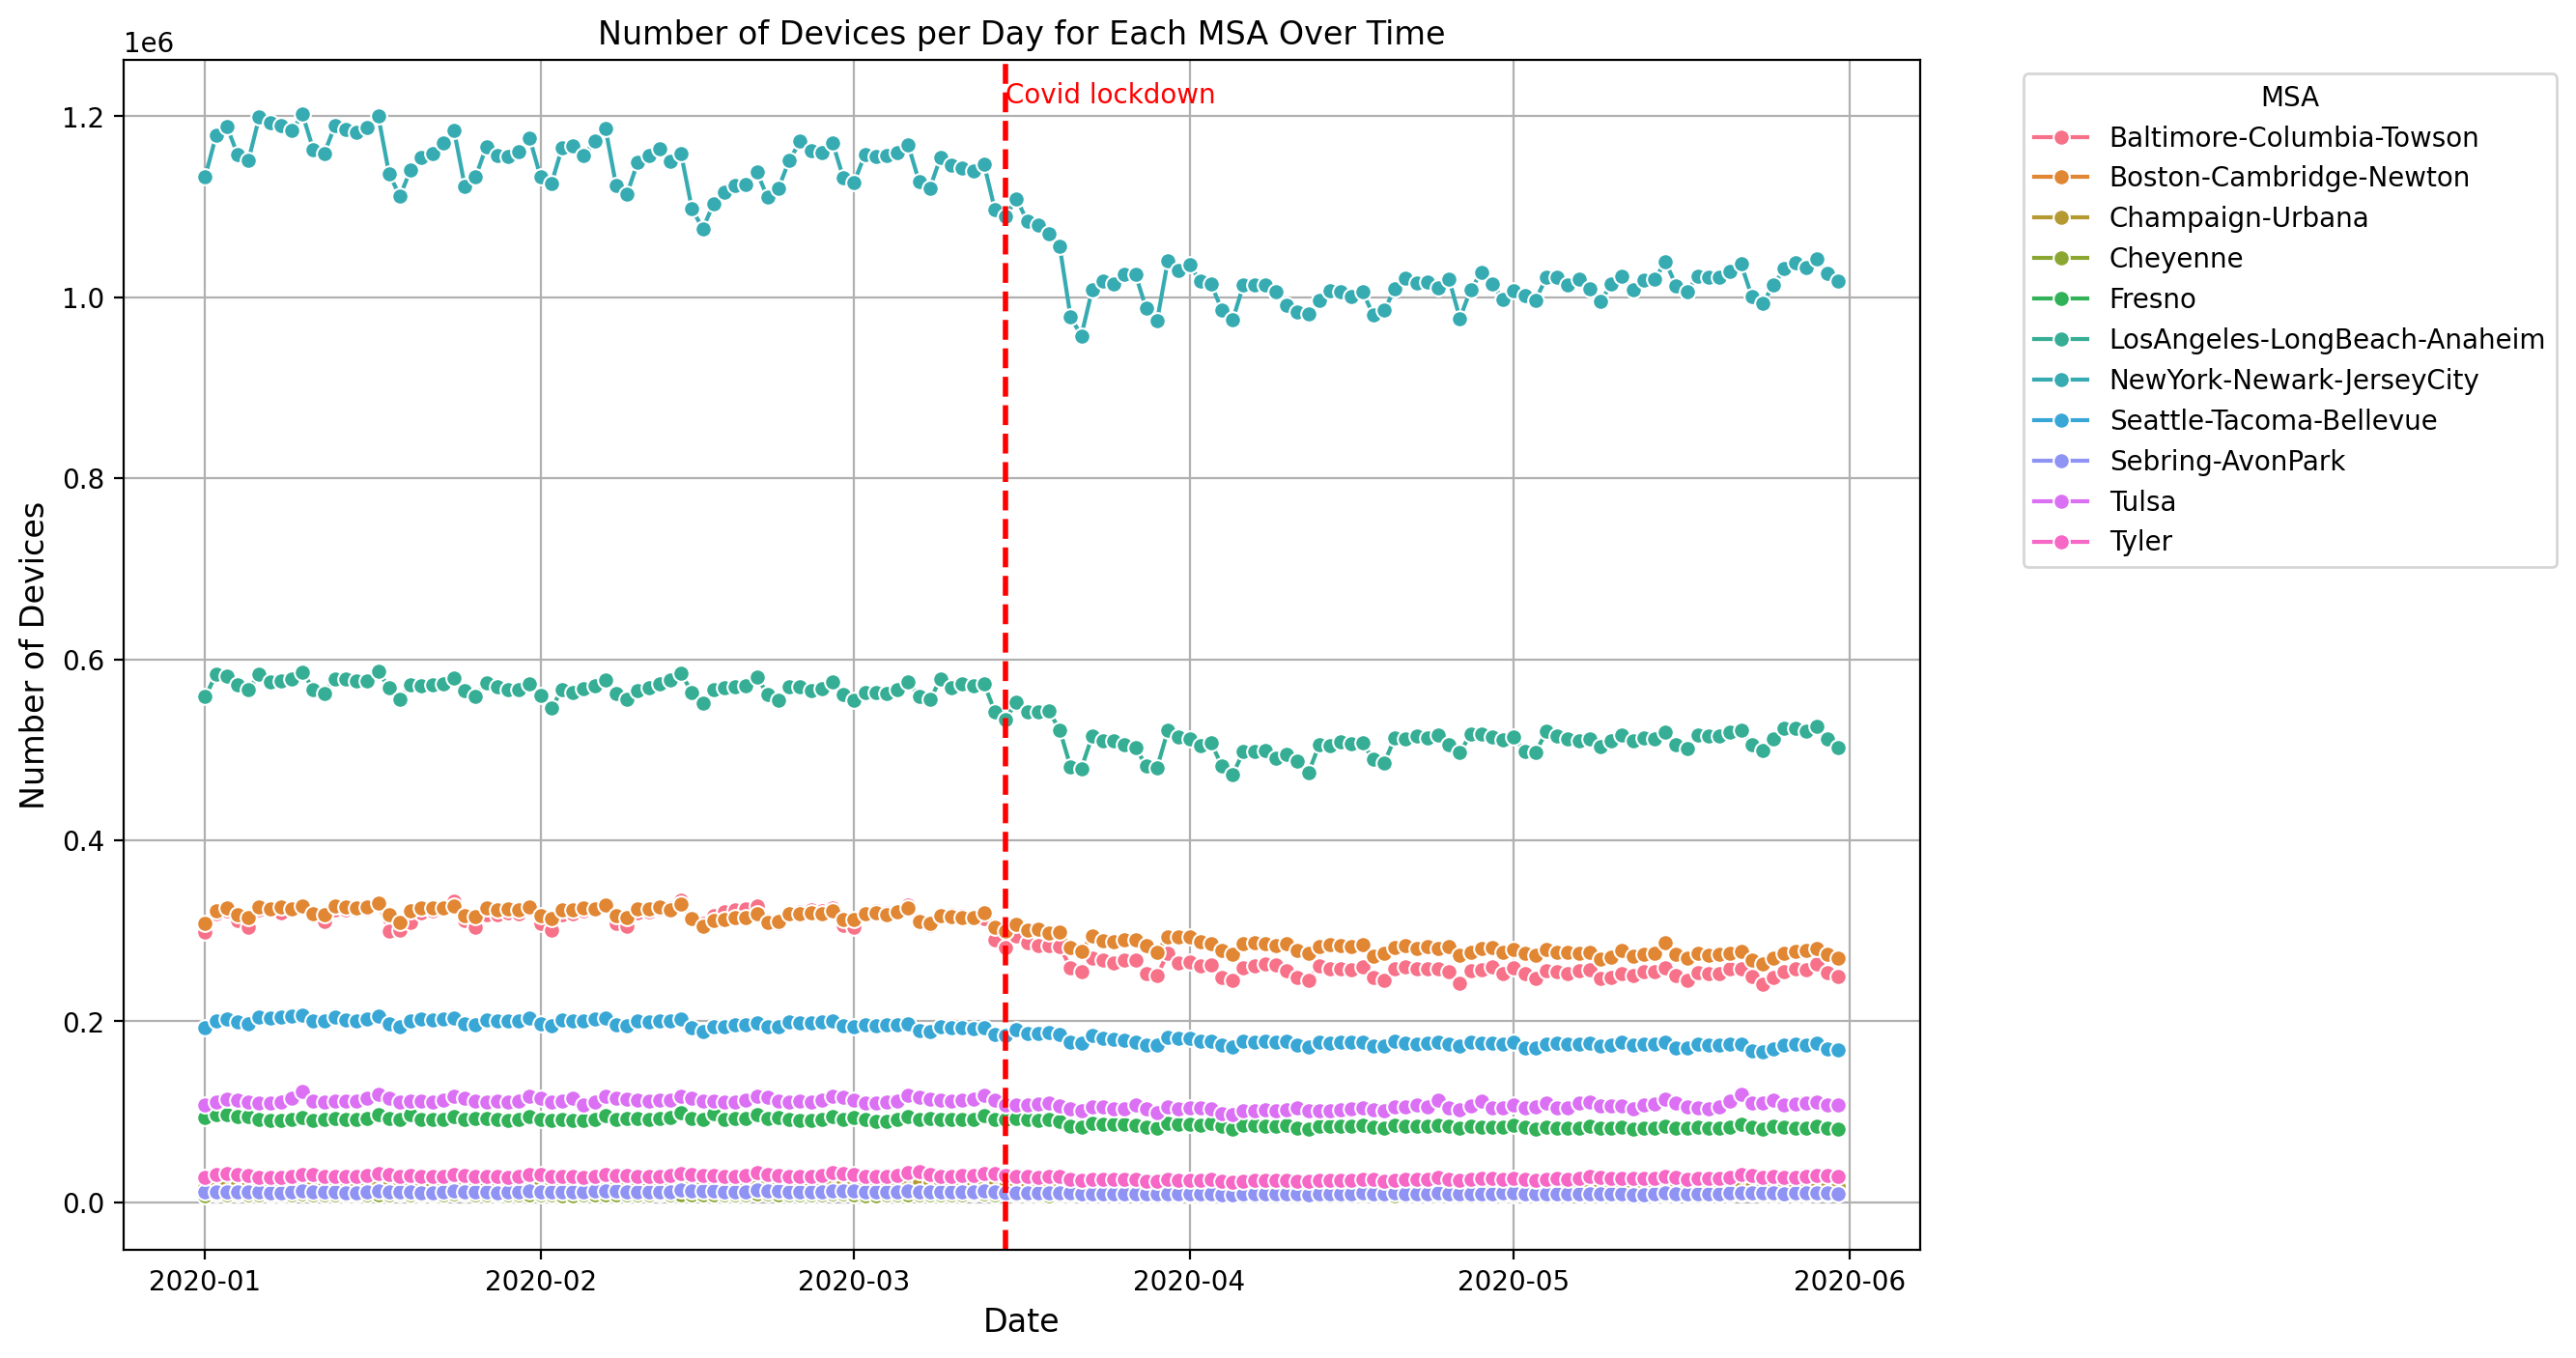

In [3]:
plt.figure(figsize=(12, 8),dpi=200)
sns.lineplot(data=daily_devices_df, x='date', y='num_of_device', hue='MSA', marker='o')
plt.title('Number of Devices per Day for Each MSA Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Devices', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='MSA', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axvline(pd.Timestamp('2020-03-15'), color='red', linestyle='--', lw=2)
plt.text(pd.Timestamp('2020-03-15'), daily_devices_df['num_of_device'].max()*1.01, 'Covid lockdown', color='red', fontsize=10)

plt.grid(True)

If we want to check the sampling rate for each MSA

In [4]:
# # The population of each MSA is hard-coded here
# population_data = {
#     'Baltimore-Columbia-Towson': 2844510, 'Boston-Cambridge-Newton': 4900550,'Champaign-Urbana':236514, 
#     'Cheyenne':100984, 'Fresno':1171617,'LosAngeles-LongBeach-Anaheim':12872322, 'NewYork-Newark-JerseyCity':22432947,
#     'Seattle-Tacoma-Bellevue':4034248, 'Sebring-AvonPark':105618, 'Tulsa':1034123, 'Tyler':109286
# }
# daily_devices_df['population'] = daily_devices_df['MSA'].apply(lambda x:population_data[x])
# daily_devices_df['Sampling_rate'] = daily_devices_df['num_of_device']/daily_devices_df['population']

## Number of records per device over time

In [5]:
daily_metrics_df = pd.read_csv('Metrics/daily_metrics.csv')
daily_metrics_df['date'] = pd.to_datetime(daily_metrics_df['date'])
# Define the date range, some dates in June seems to have issues, thus only Jan to May is shown, adjust if needed
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-05-31')
# Filter the data
daily_metrics_df = daily_metrics_df[
    (daily_metrics_df['date'] >= start_date) & 
    (daily_metrics_df['date'] <= end_date)
]

In [6]:
date_range = pd.date_range(start=daily_metrics_df['date'].min(), end=daily_metrics_df['date'].max(), freq='D')
user_ids = daily_metrics_df['user_id'].unique()
unique_users = daily_metrics_df['user_id'].unique()
unique_msa = daily_metrics_df['MSA'].unique()

date_range = pd.date_range(start=daily_metrics_df['date'].min(), end=daily_metrics_df['date'].max(), freq='D')
# Map user_id to MSA directly to avoid unnecessary combinations
user_msa_map = daily_metrics_df[['user_id', 'MSA']].drop_duplicates().set_index('user_id')
# Create a DataFrame with all date and user_id combinations
all_dates = pd.DataFrame(date_range, columns=['date'])
all_users = pd.DataFrame(user_msa_map.index.unique(), columns=['user_id'])
user_dates = pd.merge(all_dates.assign(key=1), all_users.assign(key=1), on='key').drop('key', 1)
# Add MSA to each user-date combination
complete_data = user_dates.join(user_msa_map, on='user_id')
# Merge with the original records and fill missing data
daily_metrics_df_complete = complete_data.merge(daily_metrics_df, on=['date', 'user_id', 'MSA'], how='left').fillna(0)

Exclude devices with 0 record whithin that day

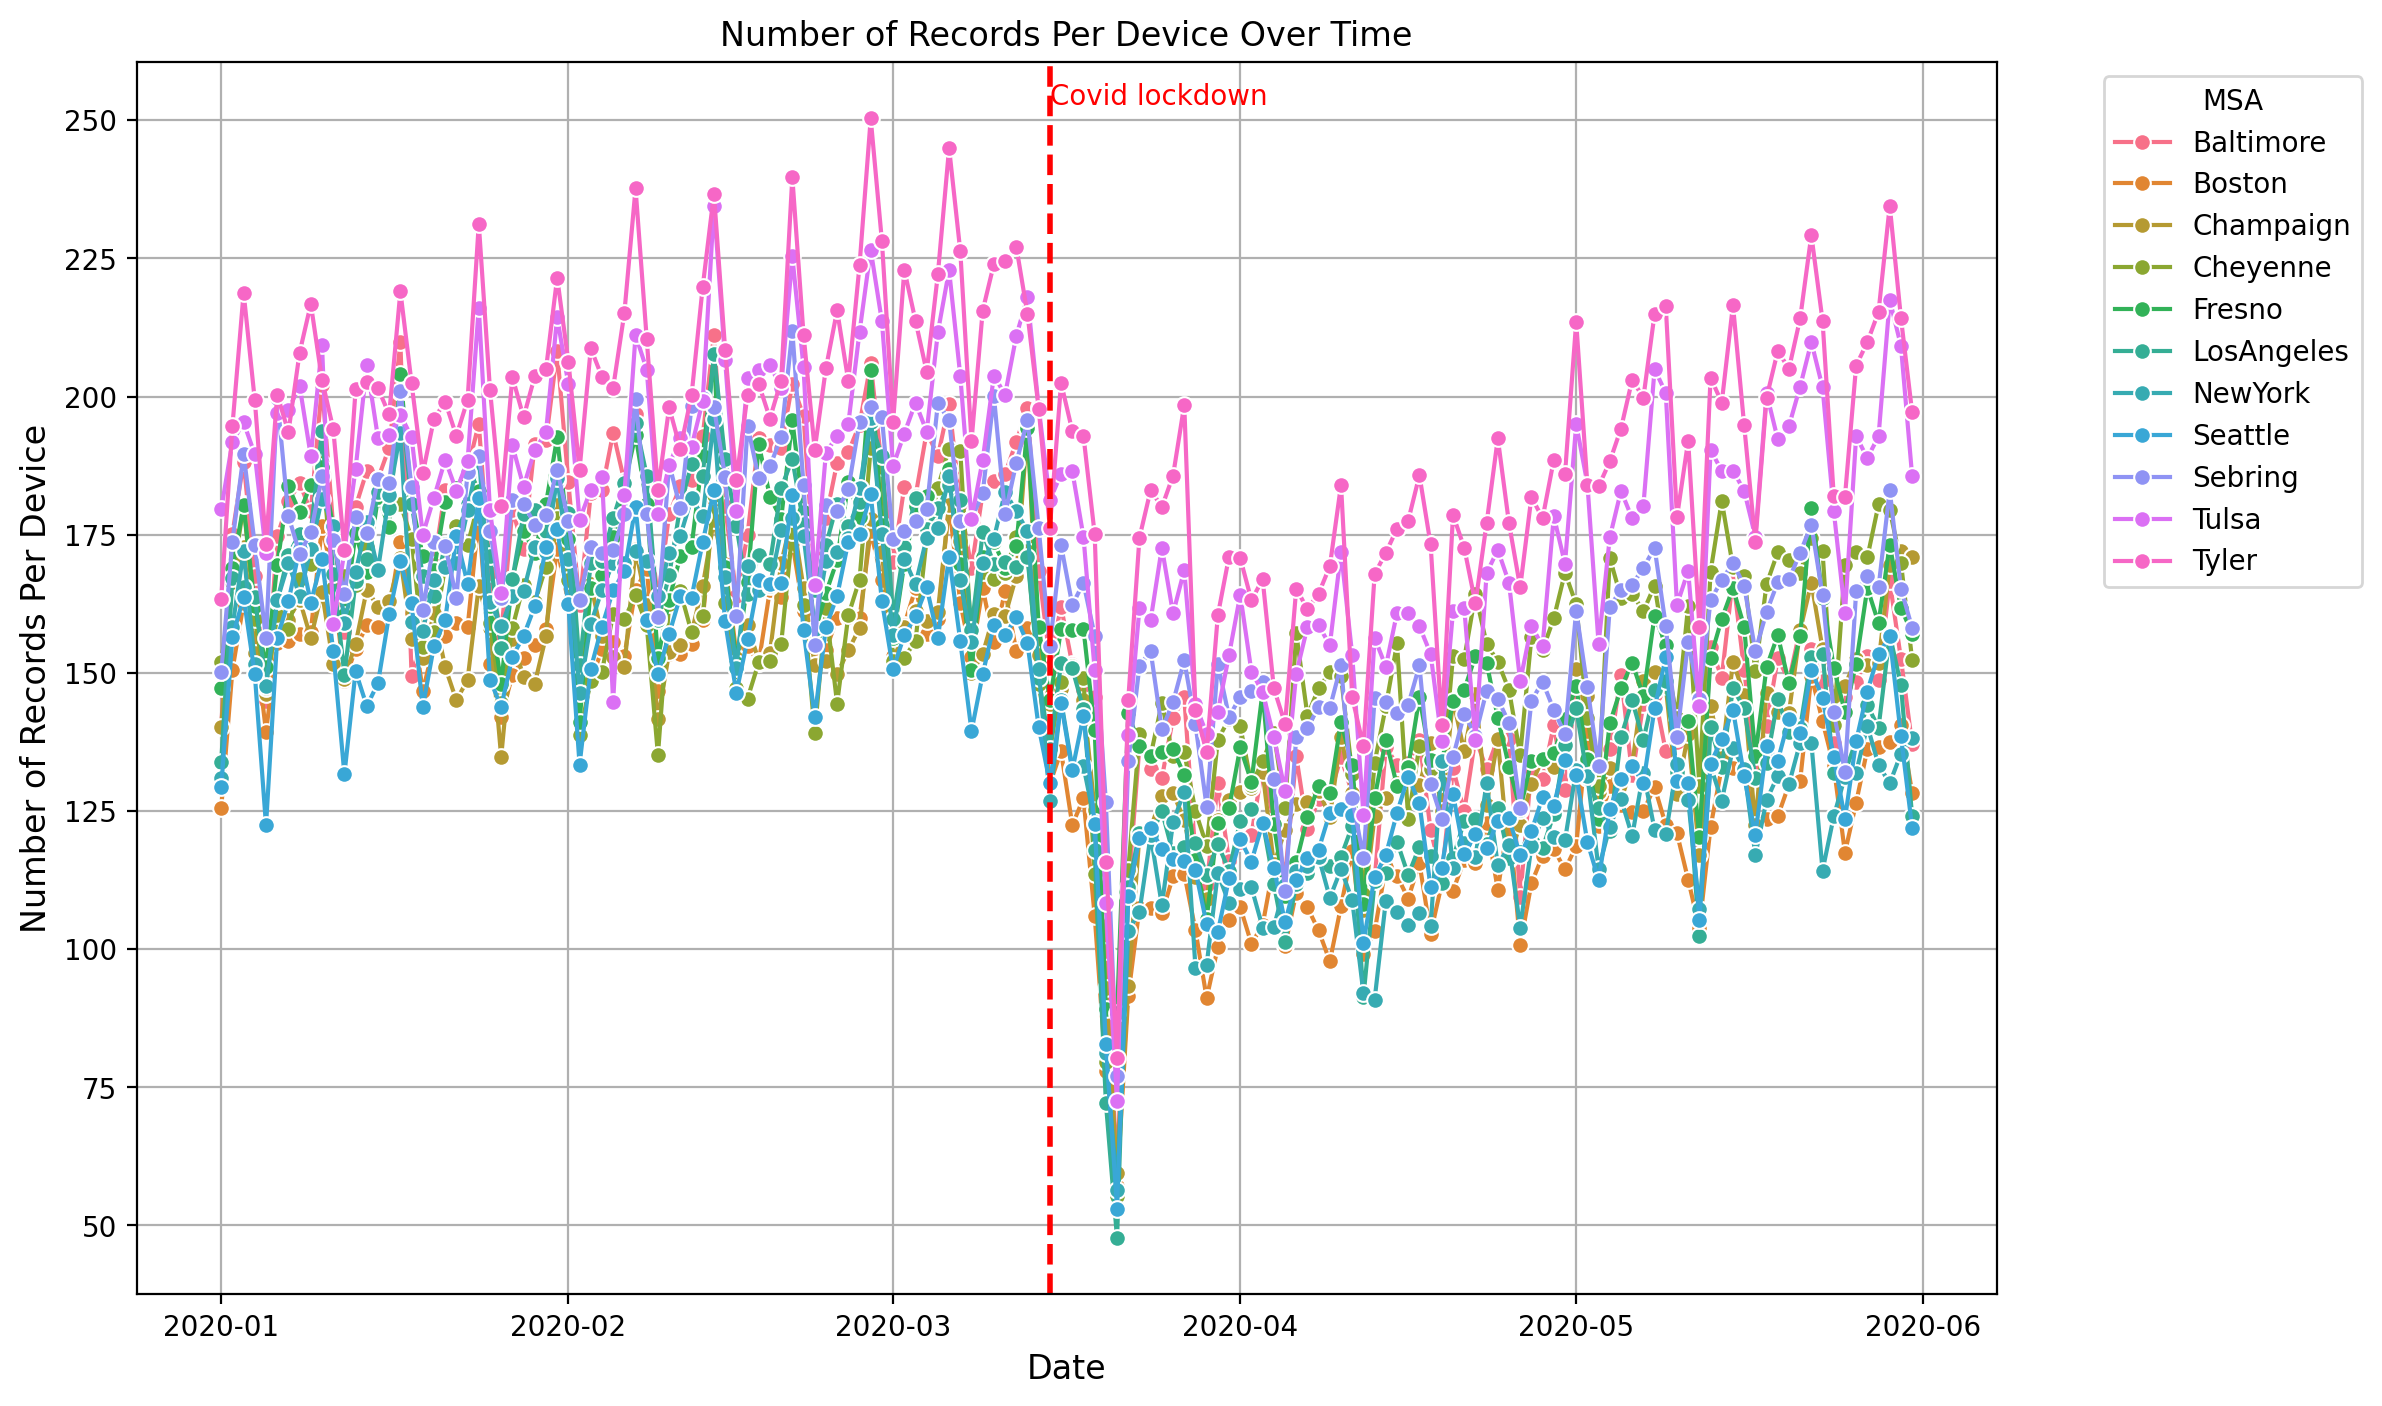

In [7]:
num_of_records_per_device_df = daily_metrics_df.groupby(['MSA','date']).num_of_records.mean().reset_index()
num_of_records_per_device_df.columns = ['MSA','date','num_of_records_per_device']


plt.figure(figsize=(12, 8),dpi=200)
sns.lineplot(data=num_of_records_per_device_df, x='date', y='num_of_records_per_device', hue='MSA', marker='o')
plt.title('Number of Records Per Device Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Records Per Device', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='MSA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(pd.Timestamp('2020-03-15'), color='red', linestyle='--', lw=2)
plt.text(pd.Timestamp('2020-03-15'), num_of_records_per_device_df['num_of_records_per_device'].max()*1.01, 'Covid lockdown', color='red', fontsize=10)

plt.grid(True)

Exclude devices with 0 record whithin that day

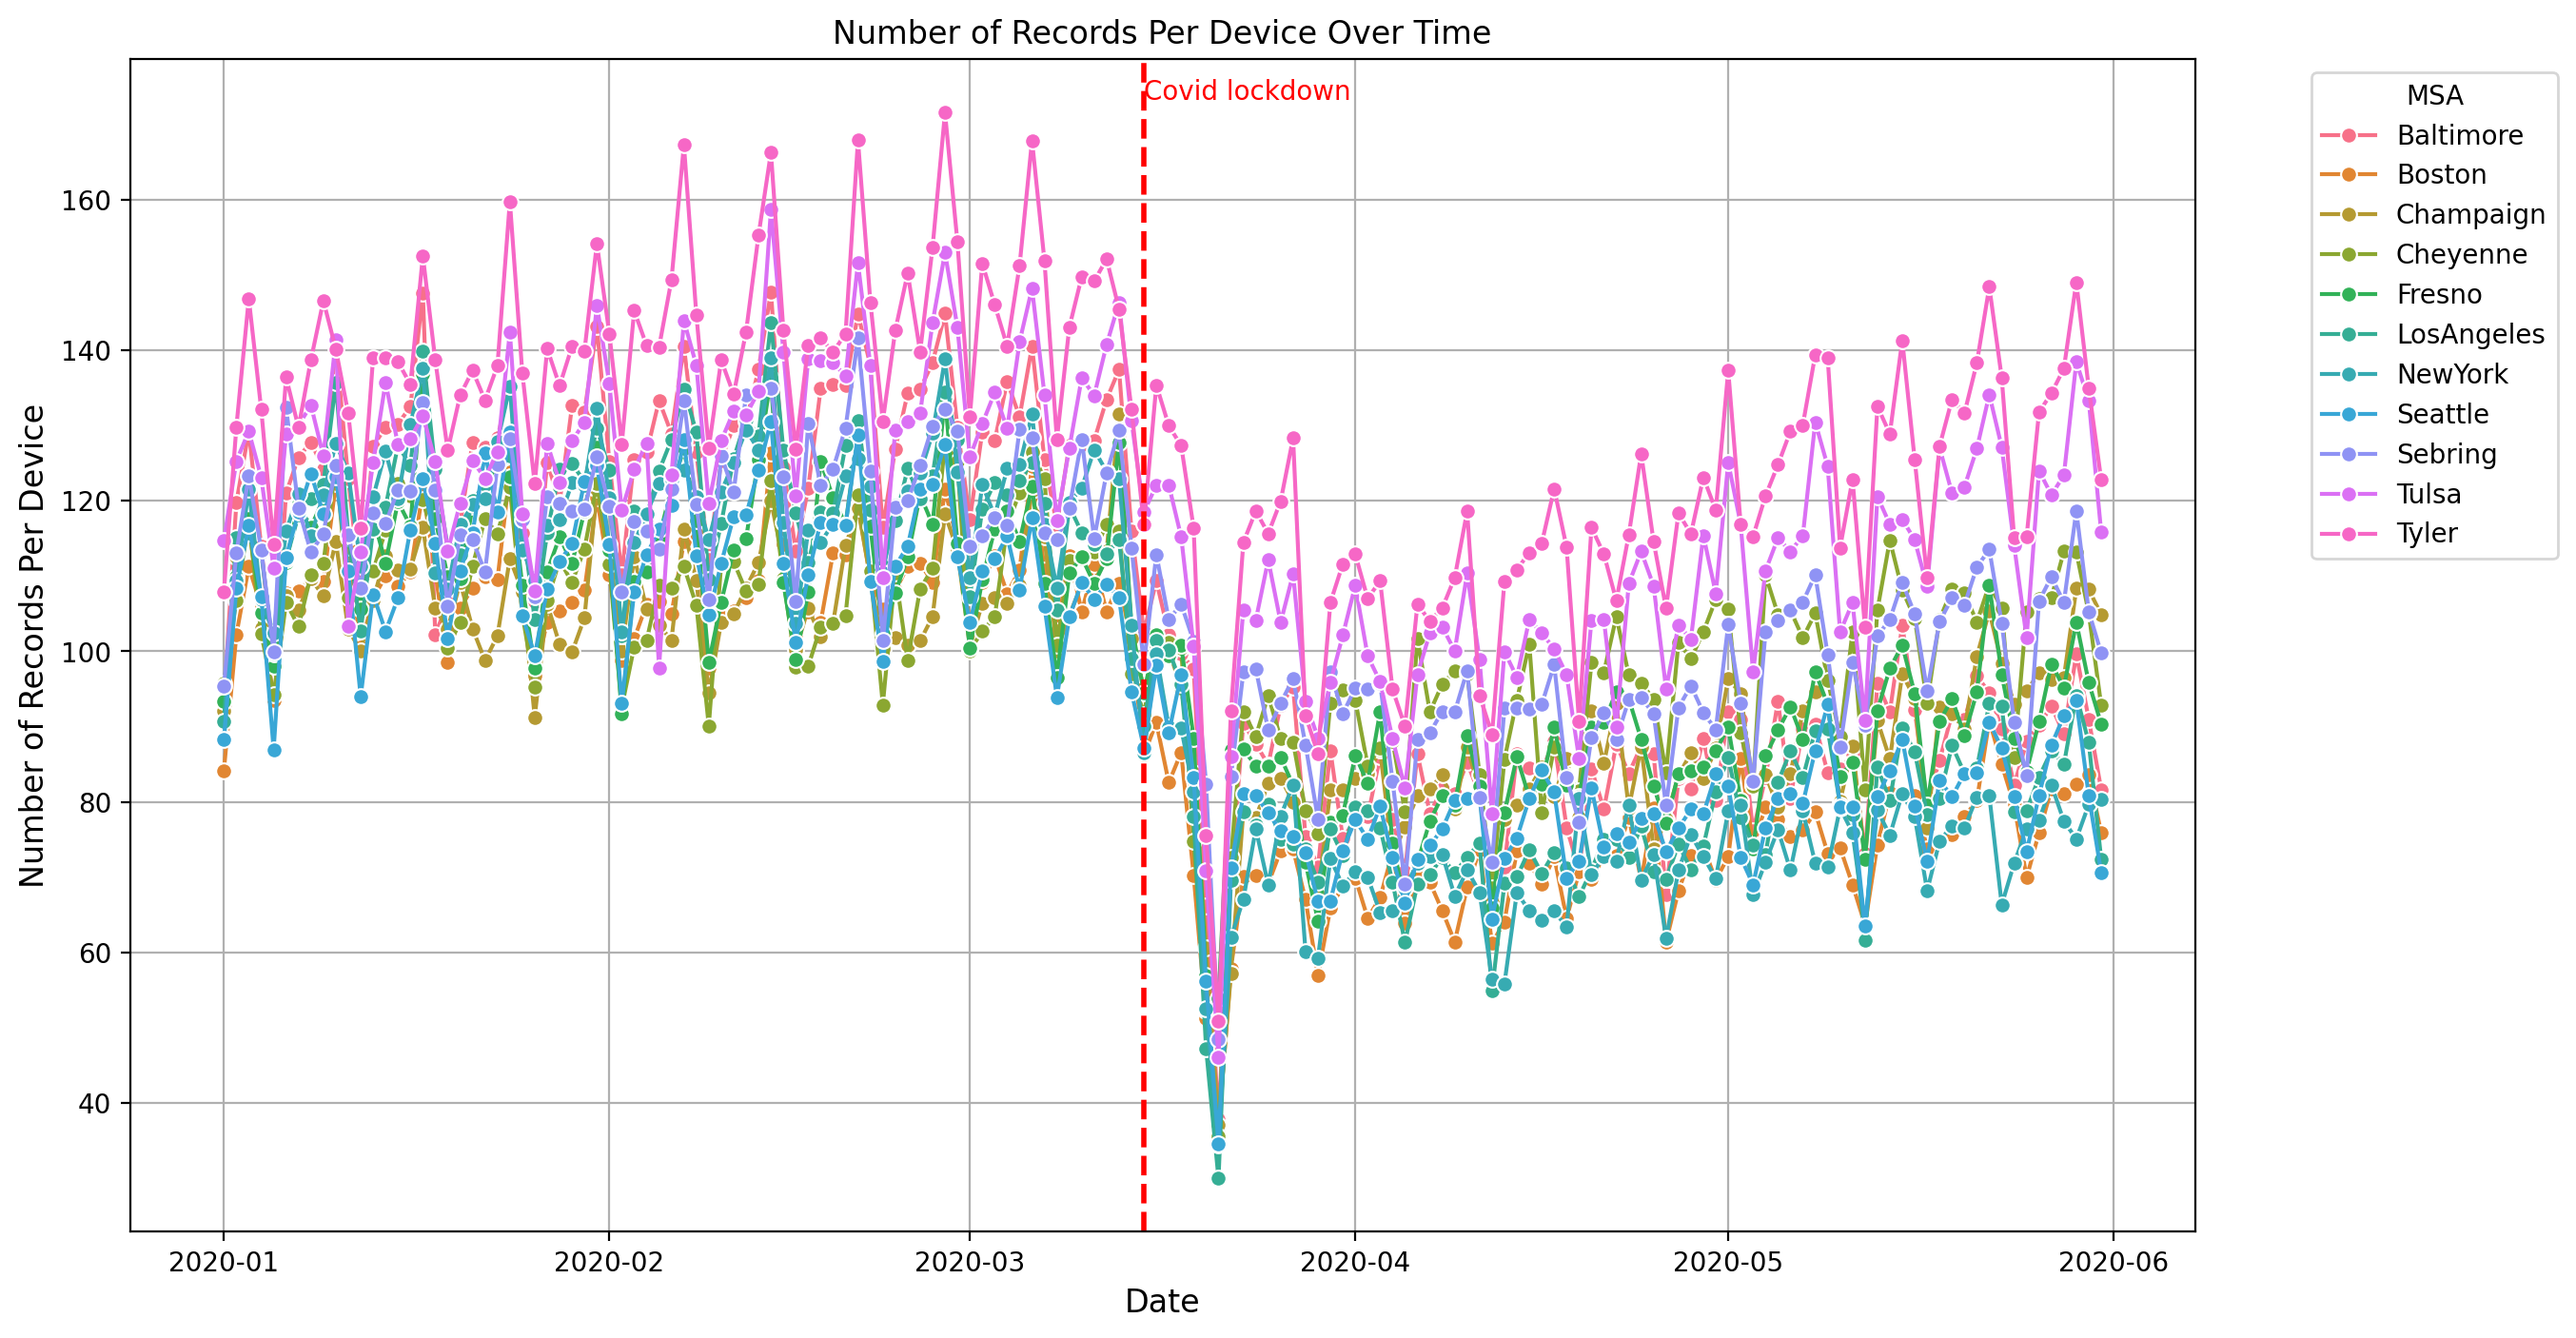

In [8]:
num_of_records_per_device_df_complete = daily_metrics_df_complete.groupby(['MSA','date']).num_of_records.mean().reset_index()
num_of_records_per_device_df_complete.columns = ['MSA','date','num_of_records_per_device']


plt.figure(figsize=(14, 8),dpi=200)
sns.lineplot(data=num_of_records_per_device_df_complete, x='date', y='num_of_records_per_device', hue='MSA', marker='o')
plt.title('Number of Records Per Device Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Records Per Device', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='MSA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axvline(pd.Timestamp('2020-03-15'), color='red', linestyle='--', lw=2)
plt.text(pd.Timestamp('2020-03-15'), num_of_records_per_device_df_complete['num_of_records_per_device'].max()*1.01, 'Covid lockdown', color='red', fontsize=10)

plt.grid(True)

# General characteristics

## Distribution of average number of records per day per user over 1 month

<Figure size 2400x1200 with 0 Axes>

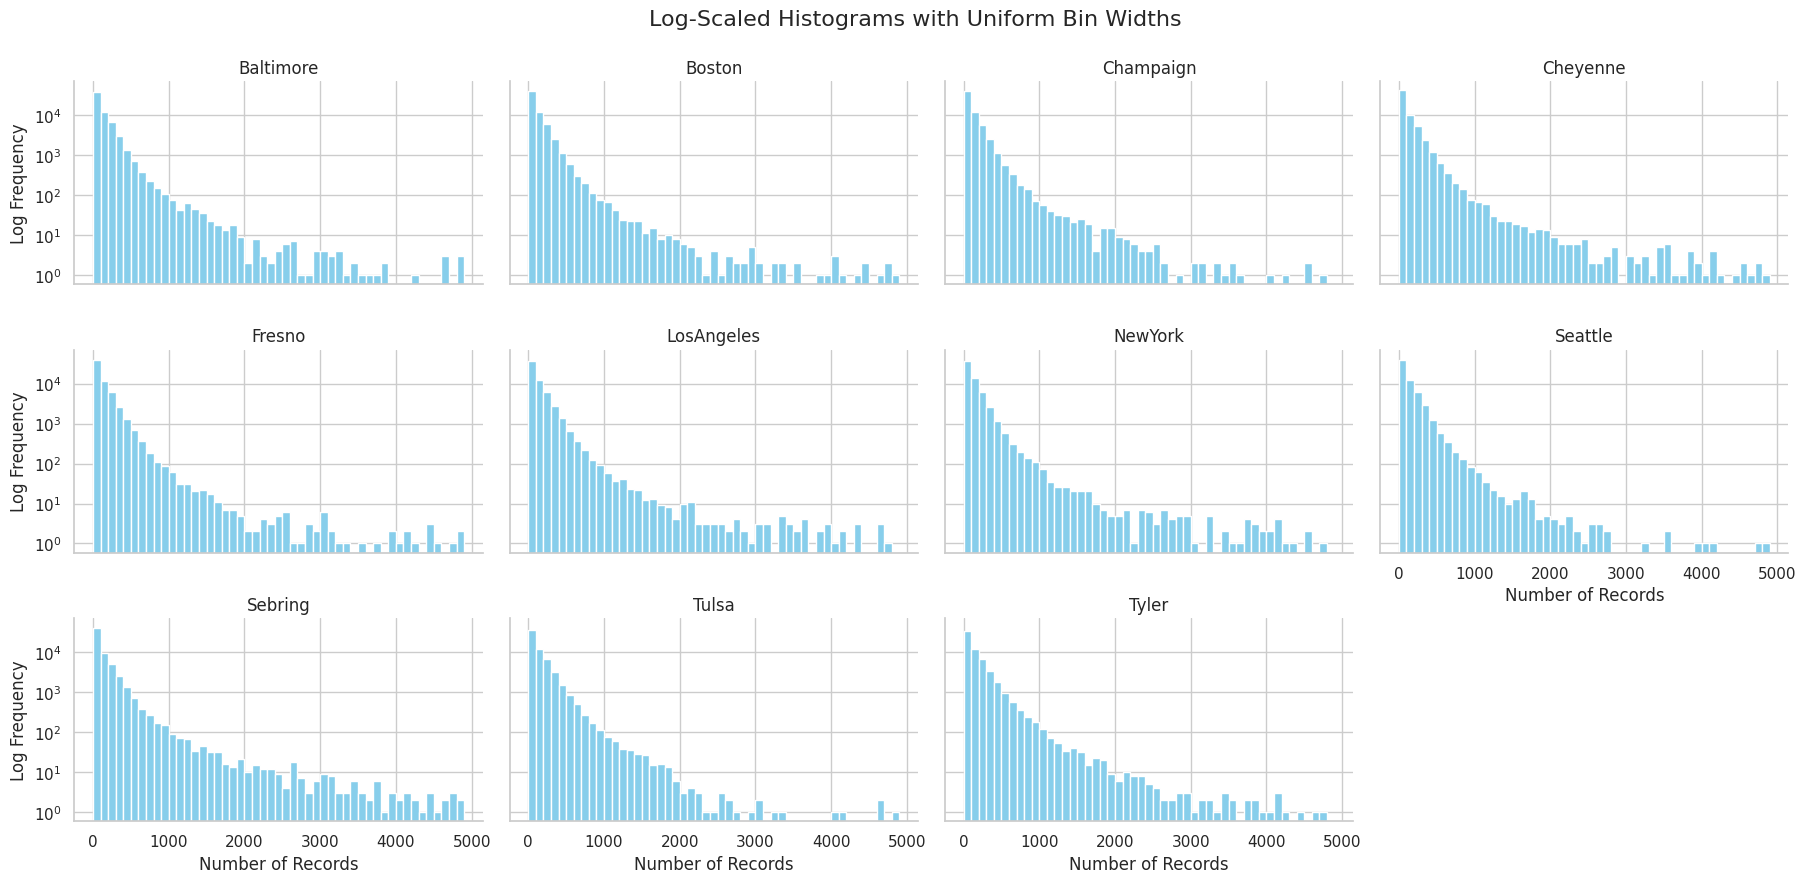

In [9]:
sampled_data = daily_metrics_df_complete[daily_metrics_df_complete.date.dt.month==1]  # Using JAN data

plt.figure(figsize=(12, 6),dpi=200)
sns.set(style="whitegrid")
g = sns.FacetGrid(sampled_data, col="MSA", col_wrap=4, height=3, aspect=1.5)
maximim_num_of_records = 5000
bin_edges = np.arange(0, maximim_num_of_records, 100)
g.map(plt.hist, "num_of_records", bins=bin_edges,color='skyblue', log=True)  # Using logarithmic scale

# Further customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("Number of Records", "Log Frequency")
g.fig.subplots_adjust(top=0.9)  # Adjust subplot spacing
g.fig.suptitle('Log-Scaled Histograms with Uniform Bin Widths', fontsize=16)

plt.show()

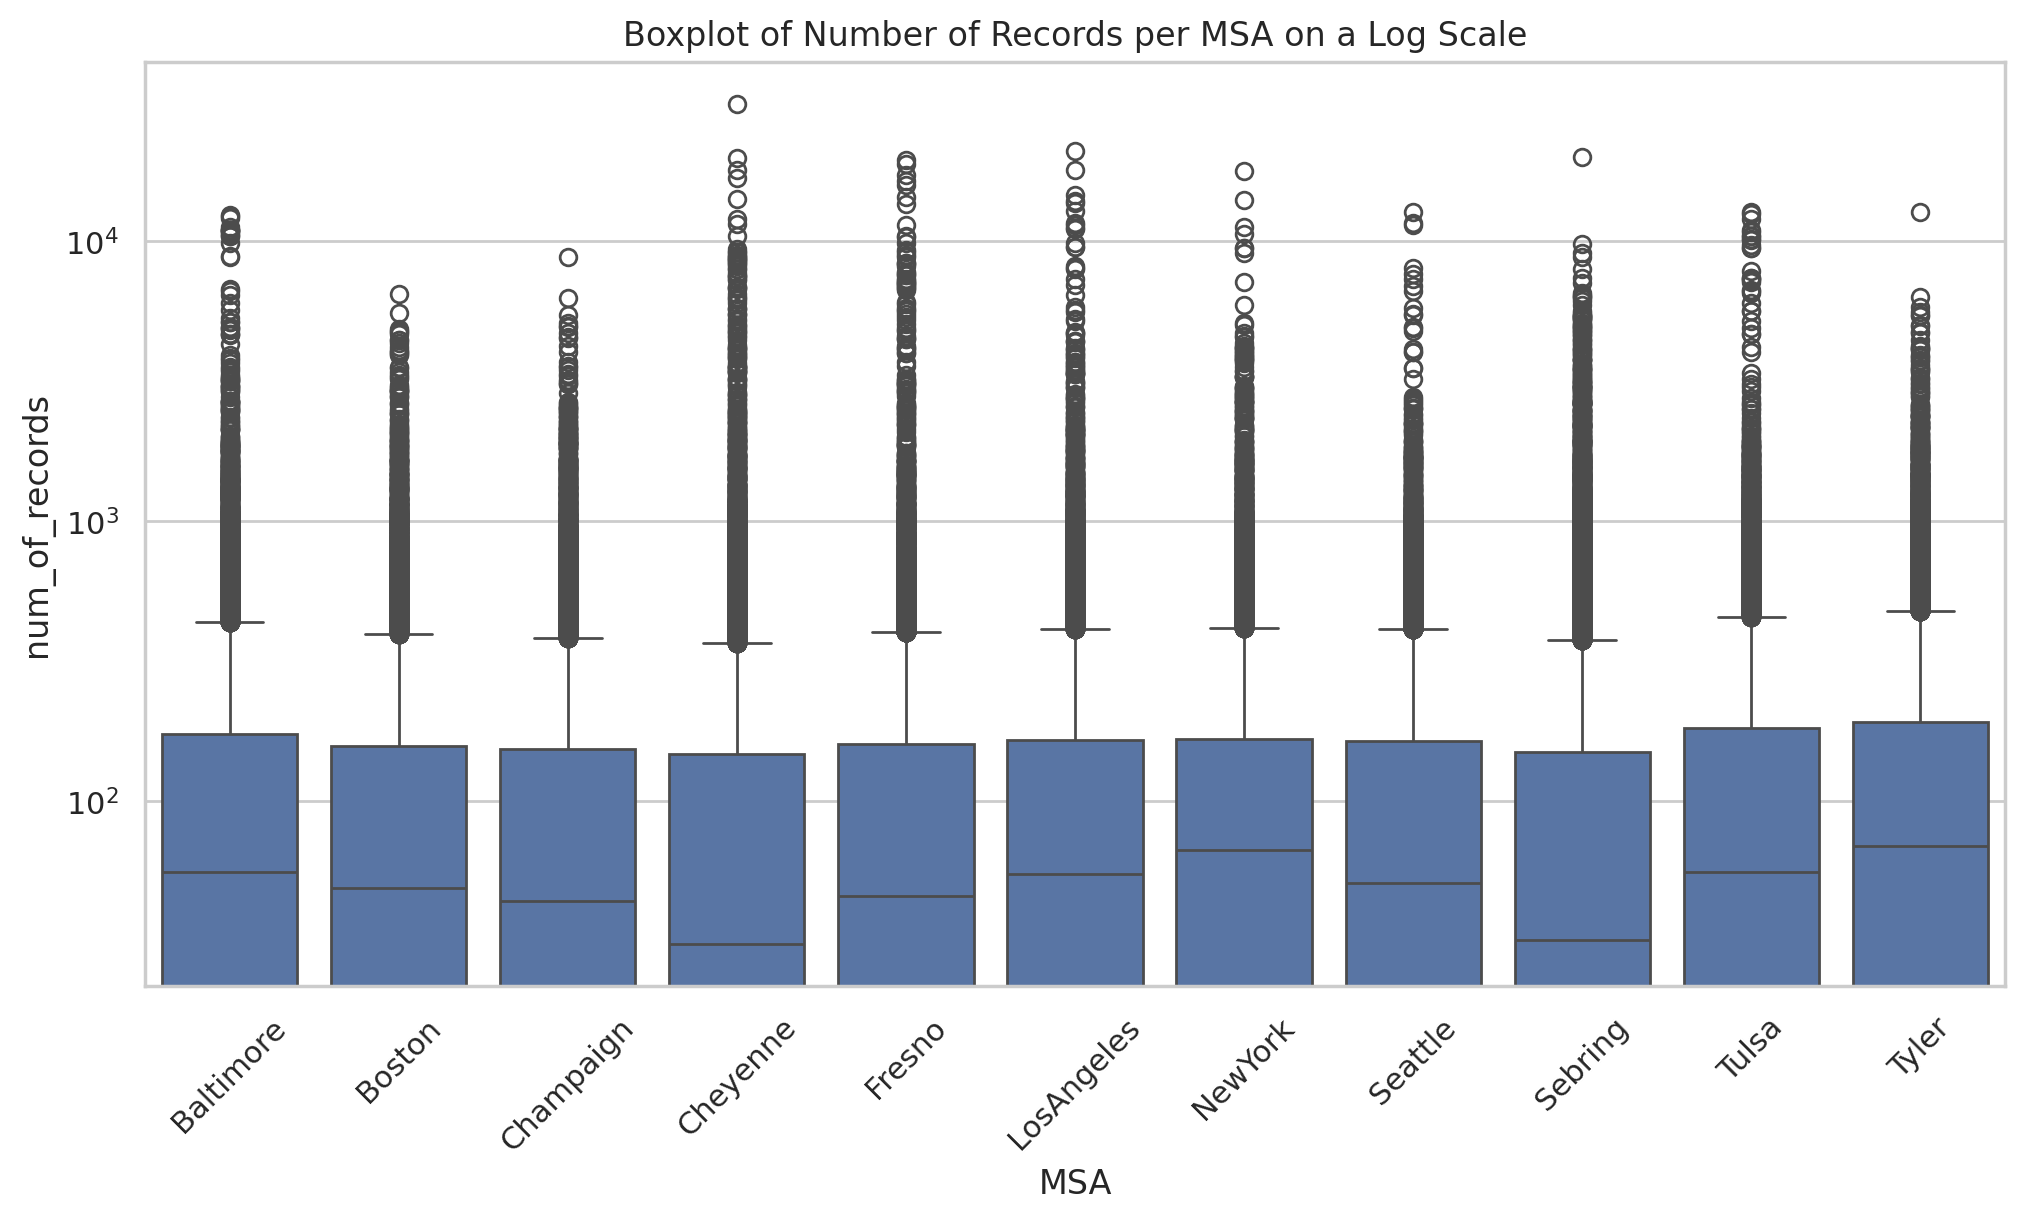

In [10]:
# Alternative of a boxplot for comparison
plt.figure(figsize=(12, 6),dpi=200)
sns.boxplot(x='MSA', y='num_of_records', data=sampled_data)
plt.yscale('log')  # Applying log scale to y-axis
plt.title('Boxplot of Number of Records per MSA on a Log Scale')
plt.xticks(rotation=45)  # Rotating x labels for better readability
plt.show()

# Temporal dimension

## Intra-day temporal occupancy

Here, we calculate temporal occupancy whithin a day (0-48) for each user and show the distribution

<Figure size 2400x1200 with 0 Axes>

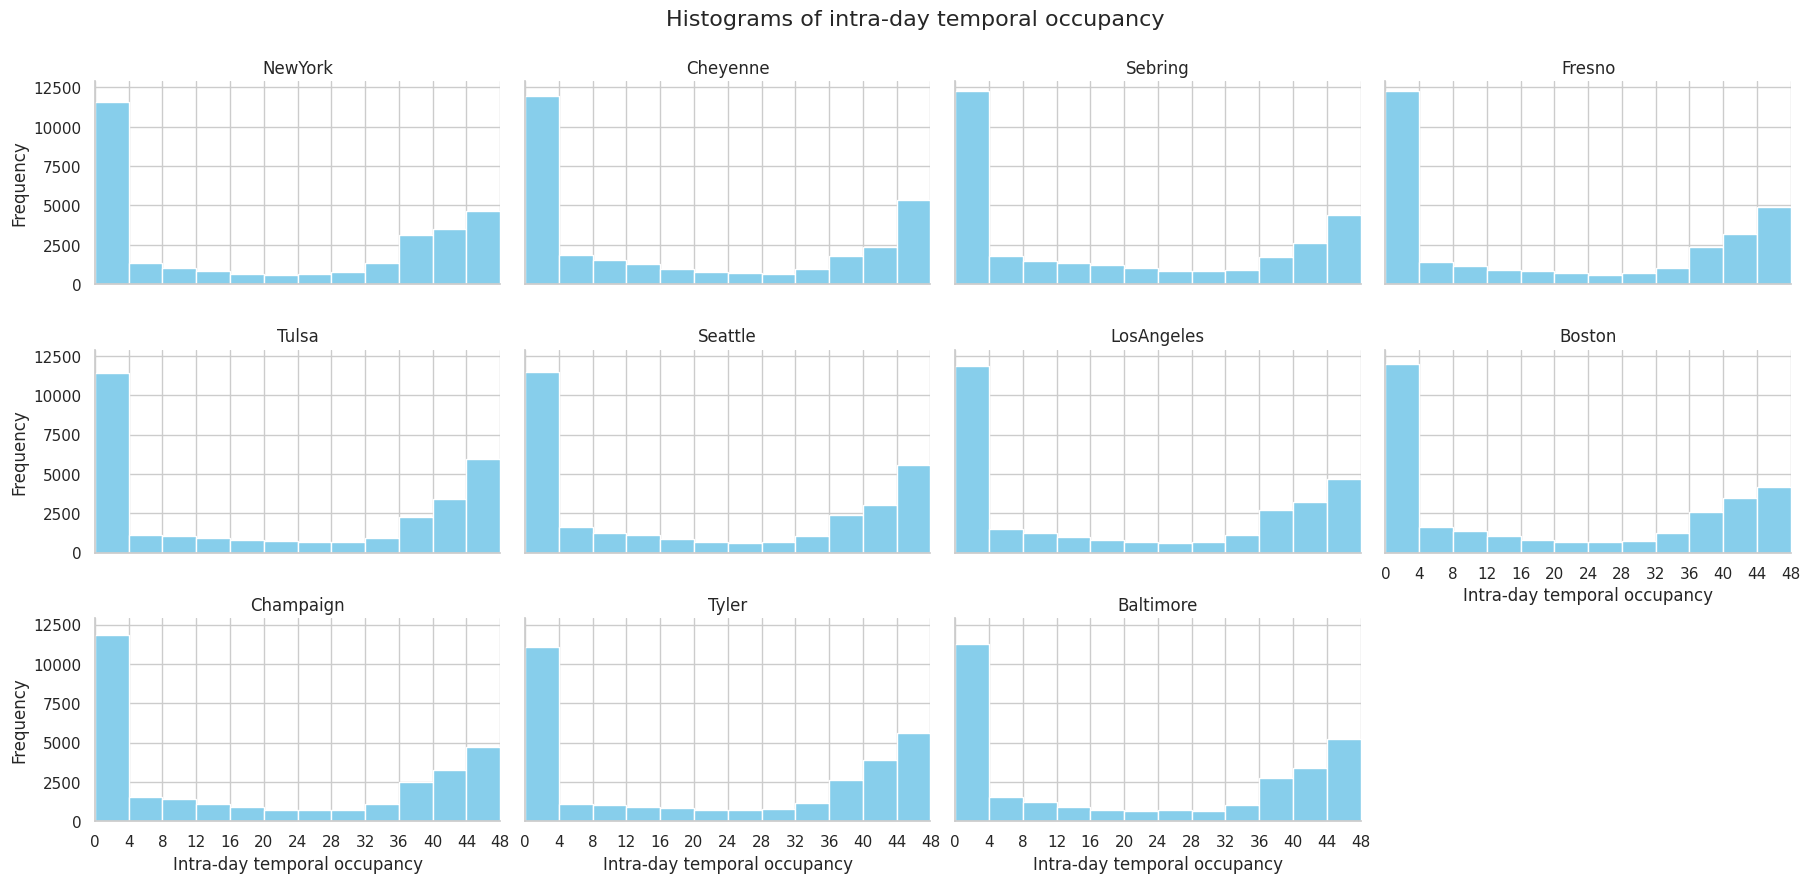

In [11]:
sampled_data = daily_metrics_df_complete.sample(frac=0.1)  # Sampling the data for speed

plt.figure(figsize=(12, 6),dpi=200)
sns.set(style="whitegrid")
g = sns.FacetGrid(sampled_data, col="MSA", col_wrap=4, height=3, aspect=1.5)
bin_edges = np.arange(0, 49, 4)
g.map(plt.hist, "intra_day_temporal_occupancy", bins=bin_edges,color='skyblue')  # Using logarithmic scale


# Set x-ticks at bin edges
for ax in g.axes.flatten():
    ax.set_xticks(np.arange(0, 49, 4))  # Set x-ticks to bin edges
    ax.set_xlim([bin_edges[0], bin_edges[-1]])  # Optional: Limit x-axis to bin range for neatness
    
# Further customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("Intra-day temporal occupancy", "Frequency")
g.fig.subplots_adjust(top=0.9)  # Adjust subplot spacing
g.fig.suptitle('Histograms of intra-day temporal occupancy', fontsize=16)

plt.show()

## Inter-day temporal occupancy

Here, we calculate temporal occupancy whithin 6 month (0-100%) for each user and show the distribution

In [12]:
inter_day_temporal_occupancy_df = daily_metrics_df_complete.groupby(['user_id','MSA'])['intra_day_temporal_occupancy'].mean().reset_index()
inter_day_temporal_occupancy_df.columns = ['user_id','MSA','inter_day_temporal_occupancy']
inter_day_temporal_occupancy_df['inter_day_temporal_occupancy'] = inter_day_temporal_occupancy_df['inter_day_temporal_occupancy']/48*100

<Figure size 2400x1200 with 0 Axes>

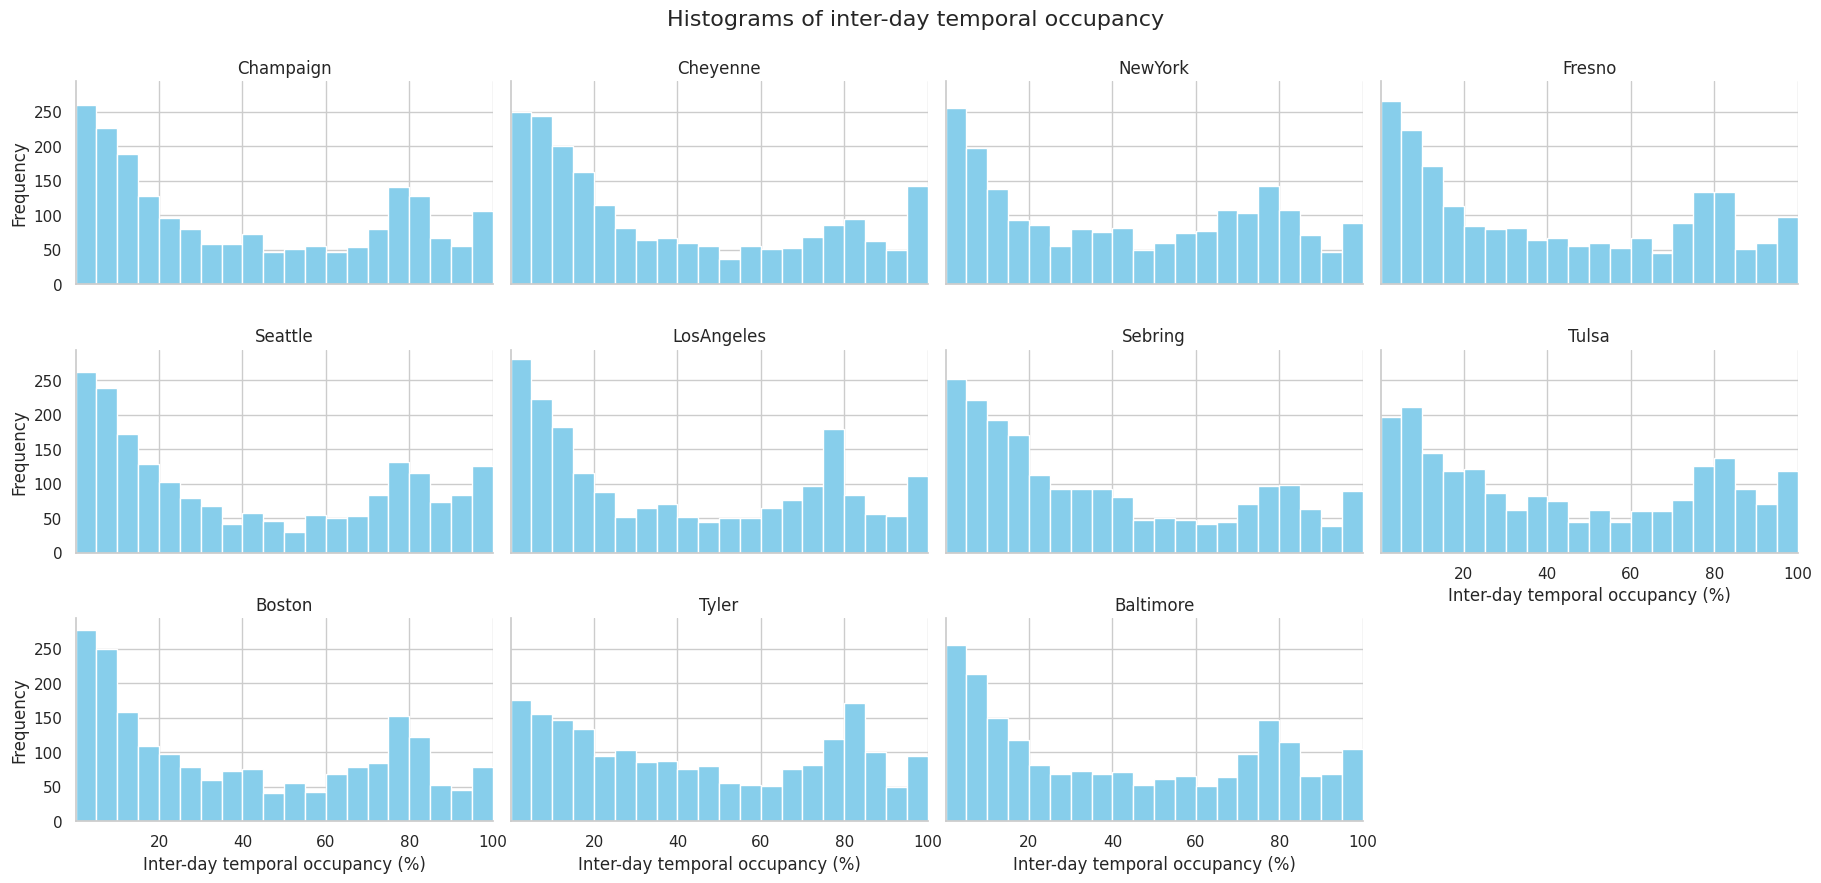

In [13]:
plt.figure(figsize=(12, 6),dpi=200)
sns.set(style="whitegrid")
g = sns.FacetGrid(inter_day_temporal_occupancy_df, col="MSA", col_wrap=4, height=3, aspect=1.5)
bin_edges = np.arange(0, 101, 5)
g.map(plt.hist, "inter_day_temporal_occupancy", bins=bin_edges,color='skyblue')  # Using logarithmic scale

# Set x-ticks at bin edges
for ax in g.axes.flatten():
    ax.set_xticks(np.arange(20, 101, 20))  # Set x-ticks to bin edges
    ax.set_xlim([bin_edges[0], bin_edges[-1]])  # Optional: Limit x-axis to bin range for neatness

# Further customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("Inter-day temporal occupancy (%)", "Frequency")
g.fig.subplots_adjust(top=0.9)  # Adjust subplot spacing
g.fig.suptitle('Histograms of inter-day temporal occupancy', fontsize=16)

plt.show()

# Spatial dimension

In [14]:
longterm_metrics_df = pd.read_csv('Metrics/longterm_metrics.csv')
longterm_metrics_df['acc_rate'] *= 100

## Radius of gyration

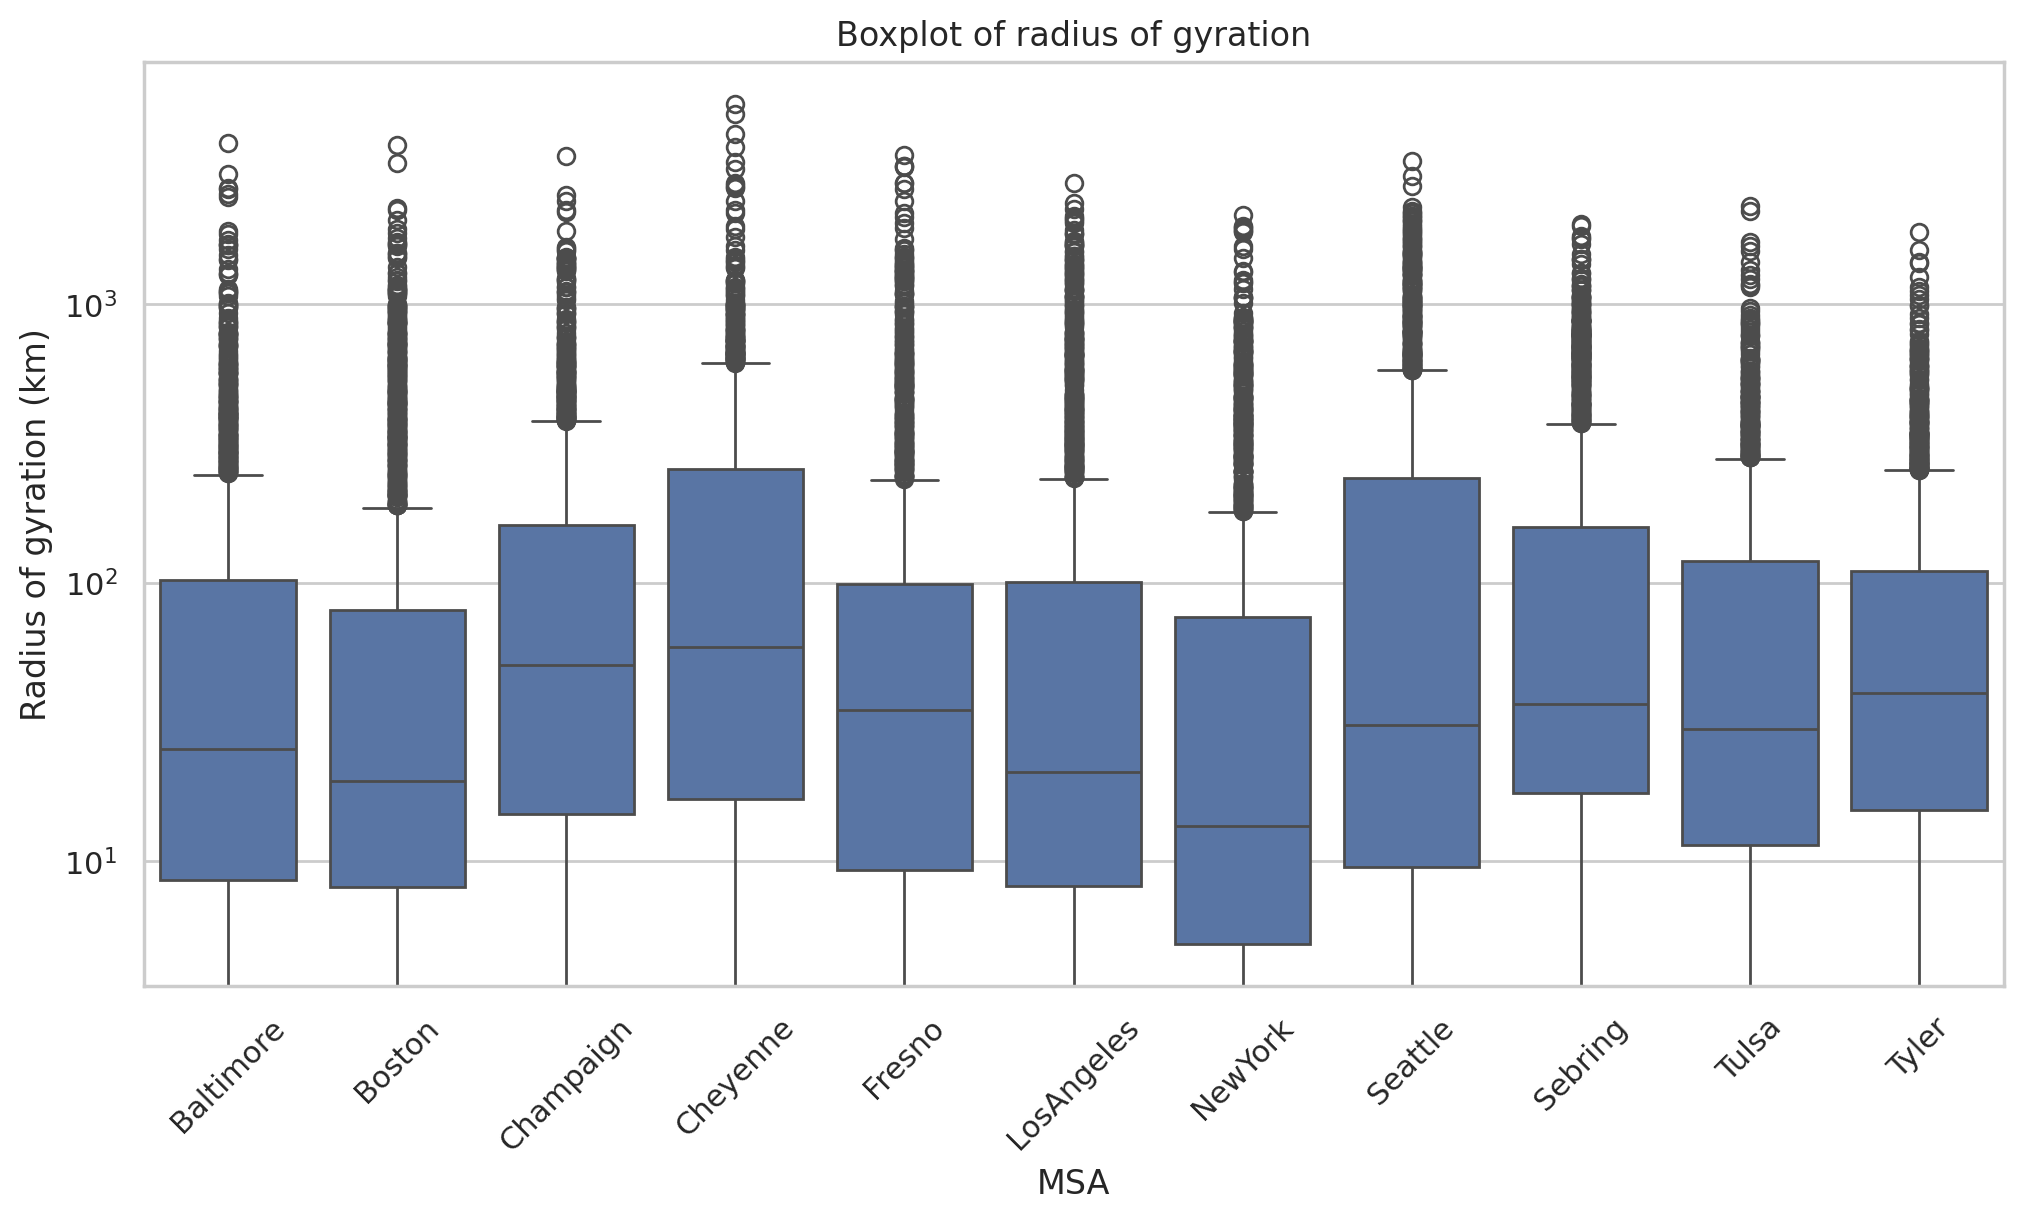

In [15]:
plt.figure(figsize=(12, 6),dpi=200)
sns.boxplot(x='MSA', y='radius_of_gyration', data=longterm_metrics_df)
plt.yscale('log')  # Applying log scale to y-axis
plt.title('Boxplot of radius of gyration')
plt.ylabel('Radius of gyration (km)')
plt.xticks(rotation=45)  # Rotating x labels for better readability
plt.show()

## % of records with high precision

<Figure size 2400x1200 with 0 Axes>

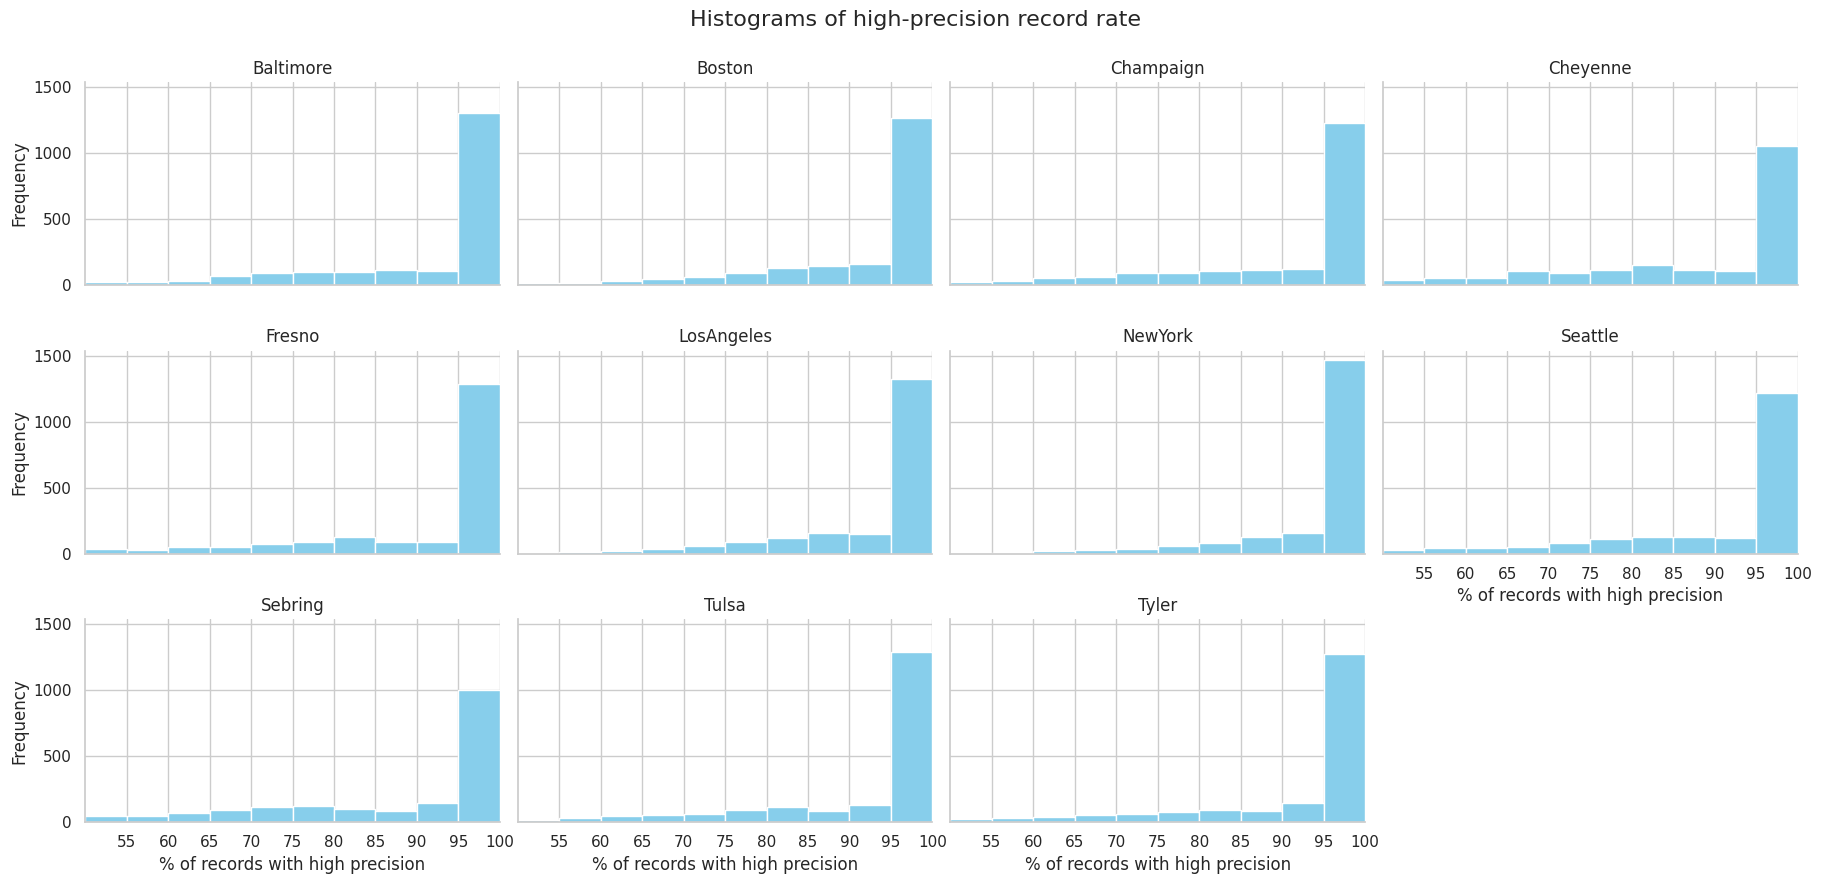

In [16]:
plt.figure(figsize=(12, 6),dpi=200)
sns.set(style="whitegrid")
g = sns.FacetGrid(longterm_metrics_df, col="MSA", col_wrap=4, height=3, aspect=1.5)
bin_edges = np.arange(50, 101, 5)
g.map(plt.hist, "acc_rate", bins=bin_edges,color='skyblue')  # Using logarithmic scale

# Set x-ticks at bin edges
for ax in g.axes.flatten():
    ax.set_xticks(np.arange(55, 101, 5))  # Set x-ticks to bin edges
    ax.set_xlim([bin_edges[0], bin_edges[-1]])  # Optional: Limit x-axis to bin range for neatness

# Further customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("% of records with high precision", "Frequency")
g.fig.subplots_adjust(top=0.9)  # Adjust subplot spacing
g.fig.suptitle('Histograms of high-precision record rate', fontsize=16)

plt.show()

## Euclidean distance mean

<Figure size 2400x1200 with 0 Axes>

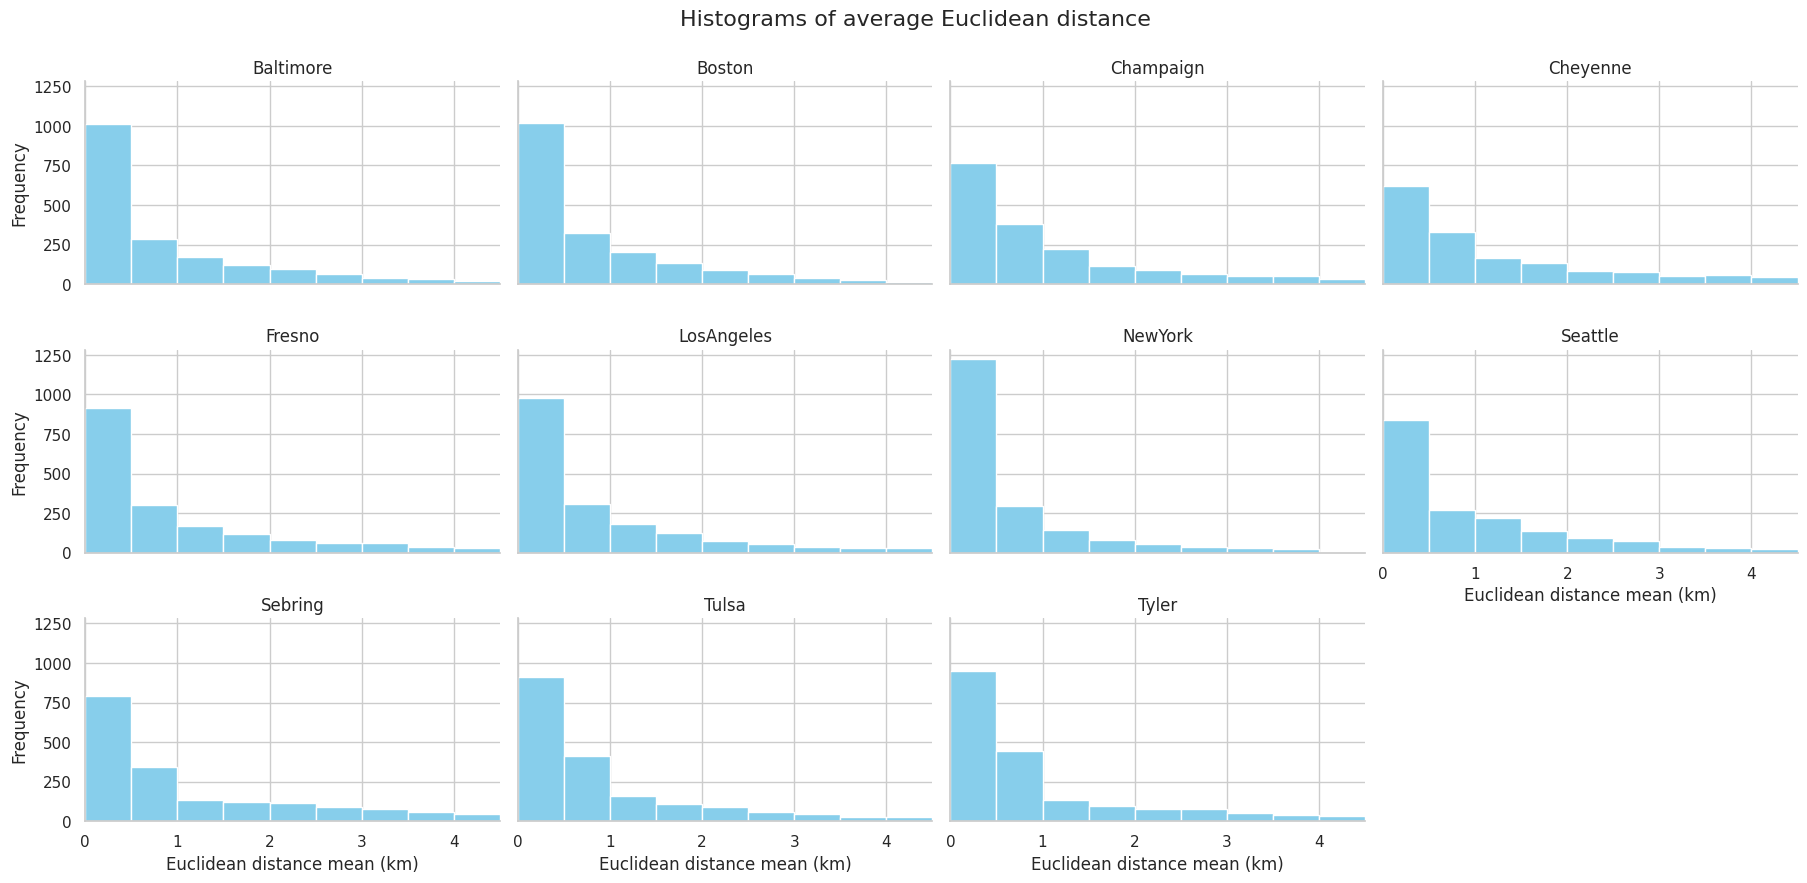

In [17]:
plt.figure(figsize=(12, 6),dpi=200)
sns.set(style="whitegrid")
g = sns.FacetGrid(longterm_metrics_df, col="MSA", col_wrap=4, height=3, aspect=1.5)
bin_edges = np.arange(0, 5, 0.5)
g.map(plt.hist, "euclidean_distance_mean", bins=bin_edges,color='skyblue')  # Using logarithmic scale

# Set x-ticks at bin edges
for ax in g.axes.flatten():
    ax.set_xticks(np.arange(0, 5, 1))  # Set x-ticks to bin edges
    ax.set_xlim([bin_edges[0], bin_edges[-1]])  # Optional: Limit x-axis to bin range for neatness

# Further customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("Euclidean distance mean (km)", "Frequency")
g.fig.subplots_adjust(top=0.9)  # Adjust subplot spacing
g.fig.suptitle('Histograms of average Euclidean distance', fontsize=16)

plt.show()